In [15]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership


wind_speed=ctrl.Antecedent(np.arange(0,100),'wind_speed')  
noofwindmills = ctrl.Antecedent(np.arange(0,100),'noofwindmills')
Power = ctrl.Consequent(np.arange(0, 100), 'Power')

wind_speed['very_poor']=fuzzy.trimf(wind_speed.universe,[0,5,10])
wind_speed['poor']=fuzzy.trimf(wind_speed.universe,[10,20,30])
wind_speed['average']=fuzzy.trimf(wind_speed.universe,[30,50,70])
wind_speed['good']=fuzzy.trimf(wind_speed.universe,[70,80,90])
wind_speed['very_good']=fuzzy.trimf(wind_speed.universe,[90,95,100])


noofwindmills['very_poor']=fuzzy.trimf(noofwindmills.universe,[0,5,10])
noofwindmills['poor']=fuzzy.trimf(noofwindmills.universe,[10,20,30])
noofwindmills['average']=fuzzy.trimf(noofwindmills.universe,[30,50,70])
noofwindmills['good']=fuzzy.trimf(noofwindmills.universe,[70,80,90])
noofwindmills['very_good']=fuzzy.trimf(noofwindmills.universe,[90,95,100])




# wind_speed

Power.automf(5)   # Auto-membership function population is possible with .automf(3, 5, or 7)
noofwindmills.automf(5)

#Power['decent'].view()

# The following 2 are the frequency graphs of noofwinds and wind_speed

/home/ashish/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


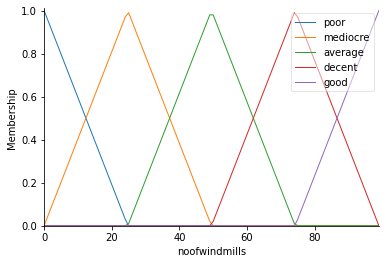

In [16]:
noofwindmills.view()

/home/ashish/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


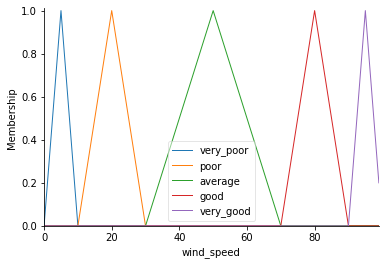

In [17]:
wind_speed.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

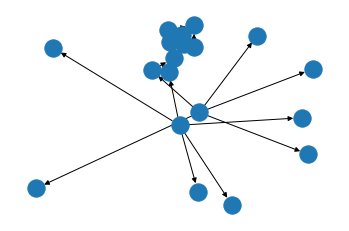

In [18]:
rule1 = ctrl.Rule(noofwindmills['poor'] | wind_speed['very_poor'], Power['poor'])

rule2 = ctrl.Rule(noofwindmills['mediocre'] | wind_speed['very_poor'] , Power['mediocre'])
rule3 = ctrl.Rule(noofwindmills['mediocre'] | wind_speed['poor'], Power['mediocre'])


rule4 = ctrl.Rule(noofwindmills['average'] | wind_speed['average'], Power['average'])

rule5 = ctrl.Rule(noofwindmills['decent'] | wind_speed['good'], Power['decent'])
rule6 = ctrl.Rule(noofwindmills['decent'] | wind_speed['average'], Power['decent'])

rule7 = ctrl.Rule(noofwindmills['good'] | wind_speed['very_good'], Power['good'])


rule1.view()

90.74500203998372


/home/ashish/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


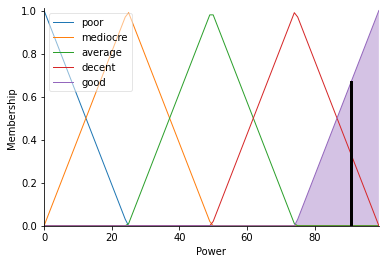

In [30]:
power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3 , rule4 , rule5 , rule6 ,rule7 ])
power = ctrl.ControlSystemSimulation(power_ctrl)

power.input['wind_speed'] = 90
power.input['noofwindmills'] = 100
power.compute()

print (power.output['Power'])
Power.view(sim=power)